<a href="https://colab.research.google.com/github/nrjcs/foundation_aiml/blob/master/mnist_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  keras mnist digit classification with convolution neural network  #


---


> similar example @ https://keras.io/examples/mnist_cnn/

In [1]:
#Load the dataset => as in the case of FCNN
 
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 	#Keras function

print ("mnist data downloaded...")


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
mnist data downloaded...


> refer to # https://keras.io/datasets/#mnist-database-of-handwritten-digits for more details

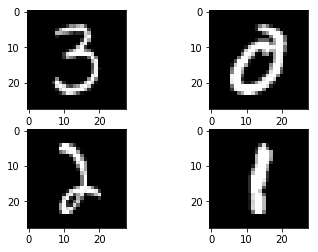

In [2]:
# this code cell is for visualization of data only...may be skipped
import matplotlib.pyplot as plt

# plot images...subplot function is being used...nice documentation is available on the official webpage of matplotlib
# arguments to subplot functions are number of rows, number of columns and number of subplots in the plot...comma is mandatory if values are less than 10
plt.subplot(221)	
plt.imshow(X_train[50], cmap=plt.get_cmap('gray')) # ploting first image of training data set
plt.subplot(222)
plt.imshow(X_train[1304], cmap=plt.get_cmap('gray'))	# ploting 135th image in training data set
plt.subplot(223)
plt.imshow(X_test[244], cmap=plt.get_cmap('gray'))	# ploting 2445th image of test date set
plt.subplot(224)
plt.imshow(X_test[39], cmap=plt.get_cmap('gray'))	# ploting 4th image of test data set
# show the plot
plt.show()


In [3]:
# Print shape of dataset..it will print three tuples, namely the no. of images in dataset, height and width(60000, 28, 28)

print (X_train.shape)

(60000, 28, 28)


In [4]:
print (Y_train.shape)

(60000,)


In [5]:
# defining some parameters
rows, cols = 28,28

# data preprocessing
#reshaping the data...Normalize images
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'test samples')

input_shape = (rows, cols, 1)
num_classes = 10 # number of classess for classification 

print (Y_train.shape)
print (Y_train[0])

import keras.utils
#Convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print (Y_train.shape)
print (Y_train[0])

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
60000 training samples
10000 test samples
(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**for reference reproducing from https://keras.io/layers/convolutional/**

> keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', 

> > activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', ..... )
  
> creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 

> If use_bias is True, a bias vector is created and added to the outputs. 

> Finally, if activation is not None, it is applied to the outputs as well.

> if first layer, provide the keyword argument input_shape e.g. input_shape=(128, 128, 3) for 128x128 RGB

> filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

> kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. 

> > Can be a single integer to specify the same value for all spatial dimensions.
    
> strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. 

> > Can be a single integer to specify the same value for all spatial dimensions.

> padding: one of "valid" or "same" (case-insensitive).

> activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

> use_bias: Boolean, whether the layer uses a bias vector.

> kernel_initializer: Initializer for the kernel weights matrix.

> bias_initializer: Initializer for the bias vector.

> filters and kernel_size parameters are compulsory



**MaxPooling2D reproduced from https://keras.io/layers/pooling/** 

> keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

> pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). 

> > If only one integer is specified, the same window length will be used for both dimensions.

> strides: Integer, tuple of 2 integers, or None. Strides values. If None, it will default to pool_size.

> padding: One of "valid" or "same"

> data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs.  channels_last
        > >  corresponds to inputs with shape  (batch, height, width, channels) while channels_first corresponds to inputs with shape  
        > >  (batch, channels, height, width). It defaults to the image_data_format value found in your Keras config file at 
        > >  ~/.keras/keras.json. If you never set it, then it will be "channels_last".


In [6]:
# Define model architecture

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

#arch 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #Flattens the input
model.add(Dense(num_classes, activation='softmax'))

# another architecture...you may experiment with the following architecture
#arch 2
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten()) # Flattens the input
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))

print ("keep going...")

W0705 06:39:23.529793 139709784151936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 06:39:23.568300 139709784151936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 06:39:23.575517 139709784151936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 06:39:23.633065 139709784151936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



keep going...


In [7]:
# compiling model

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

print ("compile successful...")

W0705 06:39:23.691733 139709784151936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 06:39:23.701816 139709784151936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



compile successful...


In [8]:
batch_size = 128
epochs = 20

# taining the network

history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

print ("training done...")


W0705 06:39:23.860558 139709784151936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 06:39:24.076640 139709784151936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 109s 2ms/step - loss: 0.2669 - acc: 0.9202 - val_loss: 0.0871 - val_acc: 0.9766
Epoch 2/20
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0722 - acc: 0.9789 - val_loss: 0.0633 - val_acc: 0.9802
Epoch 3/20
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0517 - acc: 0.9841 - val_loss: 0.0568 - val_acc: 0.9833
Epoch 4/20
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0411 - acc: 0.9873 - val_loss: 0.0540 - val_acc: 0.9852
Epoch 5/20
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0349 - acc: 0.9891 - val_loss: 0.0475 - val_acc: 0.9862
Epoch 6/20
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0284 - acc: 0.9920 - val_loss: 0.0465 - val_acc: 0.9865
Epoch 7/20
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0242 - acc: 0.9933 - val_loss: 0.0480 - 

In [9]:
# evaluating the model

score = model.evaluate(X_test, Y_test, verbose=1)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 7s 654us/step
loss: 0.05020759639829039
accuracy: 0.9887


In [10]:
#printing metrices
print (model.metrics_names)

['loss', 'acc']


In [11]:
# print model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________
None


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


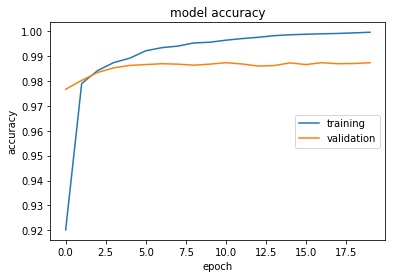

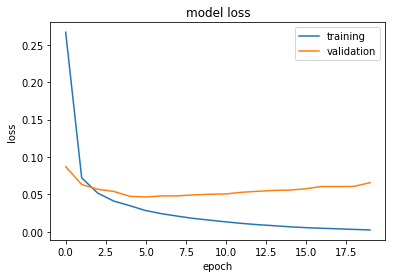

In [15]:
# to visualize the performance with plots...plot loss and accuracy in training and validation 
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

 Improving Performance
 
 > Different architecture (such as provided in code)
 
>  Number of layers

> Different layers: dropout etc.

> Different hperparameters: number of filters, stride, and padding

> Different learning rate for optimizer

> batch size

> with different optimizers

> with more number of epochs

> Controlling the optimizer learning rate

> Increasing the size of batch computation




